In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from OPTICS import optics
from Visualization import visualization, interactive_visualization

In [2]:
df = pd.read_csv('glass-clustering.csv')

In [3]:
#Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#Normalizing the data so that the data approximately follows a Gaussian distribution
df_normalized = normalize(df_scaled)

In [4]:
#Converting the numpy array into a pandas DataFrame
df_normalized = pd.DataFrame(df_normalized)
#Renaming the columns
df_normalized.columns = df.columns
df_normalized.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.387056,0.127381,0.553080,-0.310744,-0.498534,-0.296275,-0.063113,-0.155646,-0.258803
1,-0.174042,0.425729,0.456357,-0.129105,0.069267,-0.020674,-0.564066,-0.252557,-0.419945
2,-0.471910,0.101802,0.398255,0.120512,0.285714,-0.110053,-0.543668,-0.233058,-0.387521
3,-0.188254,-0.197302,0.581264,-0.266983,-0.048343,0.090402,-0.427411,-0.293041,-0.487260
4,-0.222816,-0.119597,0.474686,-0.307694,0.399909,0.057016,-0.451643,-0.257117,-0.427526


In [5]:
data_array = df_normalized.values
data_list = data_array.tolist()
X = data_list
x = data_array

In [6]:
MinPts = 10
eps = 1.75

# Run OPTICS algorithm
cluster_labels = optics(x, MinPts, eps)

# Print cluster labels
print("Cluster Labels:", cluster_labels)

Cluster Labels: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [7]:
print(set(cluster_labels))
print(cluster_labels.count(1))
print(cluster_labels.count(2))

{1, 2}
167
46


In [8]:
silhouette_avg_optics = silhouette_score(x, cluster_labels)
ch_index_optics = calinski_harabasz_score(data_list, cluster_labels)
db_index = davies_bouldin_score(x, cluster_labels)
print("Silhouette Score: ",silhouette_avg_optics)
print("Calinsky Harabasz Score: ",ch_index_optics)
print("Davies Bouldin Index:", db_index)

Silhouette Score:  0.22847513465646824
Calinsky Harabasz Score:  45.95247753264611
Davies Bouldin Index: 1.6464354602898432


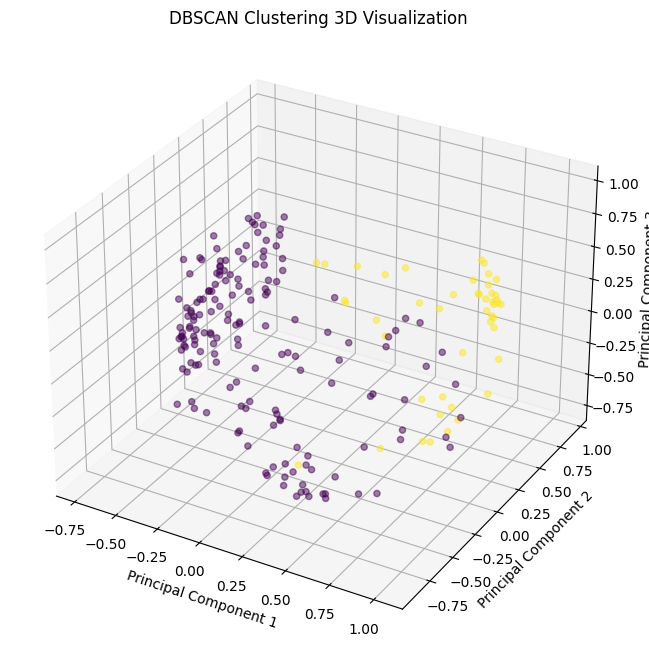

In [9]:
visualization(x, cluster_labels)

In [10]:
interactive_visualization(x, cluster_labels)